<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/FeatureVectorsComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Distances entre histogrammes (L1, L2, MDPA, Bhattacharyya)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

Fonction pour calculer la distance MDPA

In [2]:
def distMDPA(V1, V2):
    Dist=0;
    for i in range(0,len(V1)):
        dint=0;
        for j in range(0,i+1):
            dint=dint+V1[j]-V2[j]
        Dist=Dist+abs(dint)
    return Dist;

Création de 5 vecteurs. On comparera avec Vecteur1 comme base.

In [3]:
Vecteur1 = np.array([3.0, 4.0, 3.0, 1.0, 6.0])
Vecteur2 = np.array([2.0, 5.0, 3.0, 1.0, 6.0])
Vecteur3 = np.array([2.0, 4.0, 3.0, 1.0, 7.0])
Vecteur4 = np.array([1.0, 5.0, 4.0, 1.0, 6.0])
Vecteur5 = np.array([3.0, 5.0, 2.0, 2.0, 5.0])

Distance ou norme L1. Les résultats seront affichés sur un graphique.

In [4]:
dist1 = cv2.norm(Vecteur1, Vecteur2, cv2.NORM_L1)
dist2 = cv2.norm(Vecteur1, Vecteur3, cv2.NORM_L1)
dist3 = cv2.norm(Vecteur1, Vecteur4, cv2.NORM_L1)
dist4 = cv2.norm(Vecteur1, Vecteur5, cv2.NORM_L1)
#Pour affichage...
x = [0, 0.1, 0.2, 0.3]
color = ['r','g','b','k']
dist = [dist1, dist2, dist3, dist4]

Distance ou norme L2.

In [5]:
dist1 = cv2.norm(Vecteur1, Vecteur2, cv2.NORM_L2)
dist2 = cv2.norm(Vecteur1, Vecteur3, cv2.NORM_L2)
dist3 = cv2.norm(Vecteur1, Vecteur4, cv2.NORM_L2)
dist4 = cv2.norm(Vecteur1, Vecteur5, cv2.NORM_L2)
x = x + [1, 1.1, 1.2, 1.3]
dist = dist + [dist1, dist2, dist3, dist4]
color = color + ['r','g','b','k']

Distance MDPA (Maximum distance of pair assignments).

In [6]:
dist1 = distMDPA(Vecteur1, Vecteur2)
dist2 = distMDPA(Vecteur1, Vecteur3)
dist3 = distMDPA(Vecteur1, Vecteur4)
dist4 = distMDPA(Vecteur1, Vecteur5)
x = x + [2, 2.1, 2.2, 2.3]
dist = dist + [dist1, dist2, dist3, dist4]
color = color + ['r','g','b','k']

Distance de Bhattacharyya avec les valeurs normalisées entre 0 et 1. 

In [7]:
Vecteur1 = Vecteur1/np.sum(Vecteur1)
Vecteur2 = Vecteur2/np.sum(Vecteur2)
Vecteur3 = Vecteur3/np.sum(Vecteur3)
Vecteur4 = Vecteur4/np.sum(Vecteur3)
dist1 = cv2.compareHist(Vecteur1.transpose().astype('float32'), Vecteur2.transpose().astype('float32'), cv2.HISTCMP_BHATTACHARYYA) 
dist2 = cv2.compareHist(Vecteur1.transpose().astype('float32'), Vecteur3.transpose().astype('float32'), cv2.HISTCMP_BHATTACHARYYA) 
dist3 = cv2.compareHist(Vecteur1.transpose().astype('float32'), Vecteur4.transpose().astype('float32'), cv2.HISTCMP_BHATTACHARYYA)
dist4 = cv2.compareHist(Vecteur1.transpose().astype('float32'), Vecteur5.transpose().astype('float32'), cv2.HISTCMP_BHATTACHARYYA) 
x = x + [3, 3.1, 3.2, 3.3]
dist = dist + [dist1, dist2, dist3, dist4]
color = color + ['r','g','b', 'k']




Similarité cosinus.

In [8]:
dist1 = cosine_similarity(Vecteur1.reshape(1, -1), Vecteur2.reshape(1, -1)) 
dist2 = cosine_similarity(Vecteur1.reshape(1, -1), Vecteur3.reshape(1, -1)) 
dist3 = cosine_similarity(Vecteur1.reshape(1, -1), Vecteur4.reshape(1, -1))
dist4 = cosine_similarity(Vecteur1.reshape(1, -1), Vecteur5.reshape(1, -1)) 

x = x + [4, 4.1, 4.2, 4.3]
dist = dist + [dist1, dist2, dist3, dist4]
color = color + ['r','g','b', 'k']

Affichage des distances.

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


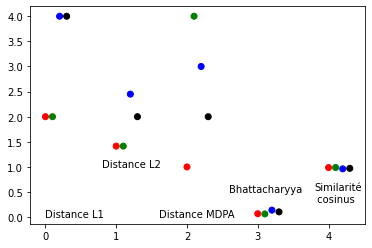

In [9]:
plt.scatter(x, dist, c = color)
plt.text(0,0, 'Distance L1')
plt.text(0.8,1, 'Distance L2')
plt.text(1.6,0, 'Distance MDPA')
plt.text(2.6,0.5, 'Bhattacharyya')
plt.text(3.8,0.3, 'Similarité\n cosinus')
plt.show()